##  Football Players Identificaton using CNN

In [20]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [21]:
!kaggle datasets download -d balabaskar/golden-foot-football-players-image-dataset

Dataset URL: https://www.kaggle.com/datasets/balabaskar/golden-foot-football-players-image-dataset
License(s): CC0-1.0
100% 516M/517M [00:36<00:00, 20.8MB/s]
100% 517M/517M [00:36<00:00, 14.9MB/s]


In [22]:
!unzip golden-foot-football-players-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: football_golden_foot/football_golden_foot/edinson_cavani/7728f17fc5.jpg  
  inflating: football_golden_foot/football_golden_foot/edinson_cavani/7777fa403a.jpg  
  inflating: football_golden_foot/football_golden_foot/edinson_cavani/782dc5f4e4.jpg  
  inflating: football_golden_foot/football_golden_foot/edinson_cavani/788e368e20.jpg  
  inflating: football_golden_foot/football_golden_foot/edinson_cavani/79384a589c.jpg  
  inflating: football_golden_foot/football_golden_foot/edinson_cavani/79a8acf2bf.jpg  
  inflating: football_golden_foot/football_golden_foot/edinson_cavani/79f0a00f23.jpg  
  inflating: football_golden_foot/football_golden_foot/edinson_cavani/79f2eccc82.jpg  
  inflating: football_golden_foot/football_golden_foot/edinson_cavani/7a27a4b4fb.jpg  
  inflating: football_golden_foot/football_golden_foot/edinson_cavani/7a600089e4.jpg  
  inflating: football_golden_foot/football_golden_foot/edinson_cavani/7b28fffab

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:
# Define the directory and image size
directory = '/content/football_golden_foot/football_golden_foot'
image_size = (256, 256)
batch_size = 32

In [8]:
# Load the training dataset (80% of the data)
train_ds = keras.utils.image_dataset_from_directory(
    directory=directory,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,  # Reserve 20% for validation
    subset='training',     # Use this for training
    seed=123               # Set a seed for reproducibility
)

Found 7188 files belonging to 22 classes.
Using 5751 files for training.


In [9]:
# Load the validation dataset (20% of the data)
validation_ds = keras.utils.image_dataset_from_directory(
    directory=directory,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,  # Reserve 20% for validation
    subset='validation',   # Use this for validation
    seed=123               # Set a seed for reproducibility
)


Found 7188 files belonging to 22 classes.
Using 1437 files for validation.


Class names: ['alessandro_del_piero', 'andreas_iniesta', 'andriy_shevchenko', 'cristiano_ronaldo', 'didier_drogba', 'diego_maradona', 'edinson_cavani', 'francesco_totti', 'gianlugi_buffon', 'iker_casillas', 'lionel_messi', 'luka_modric', 'mohamed_salah', 'pavel_nedved', 'pele', 'riyan_giggs', 'roberto_baggio', 'roberto_carlos', 'ronaldinho', 'ronaldo_nazario', 'samuel_eto', 'zlatan_ibrahimovic']


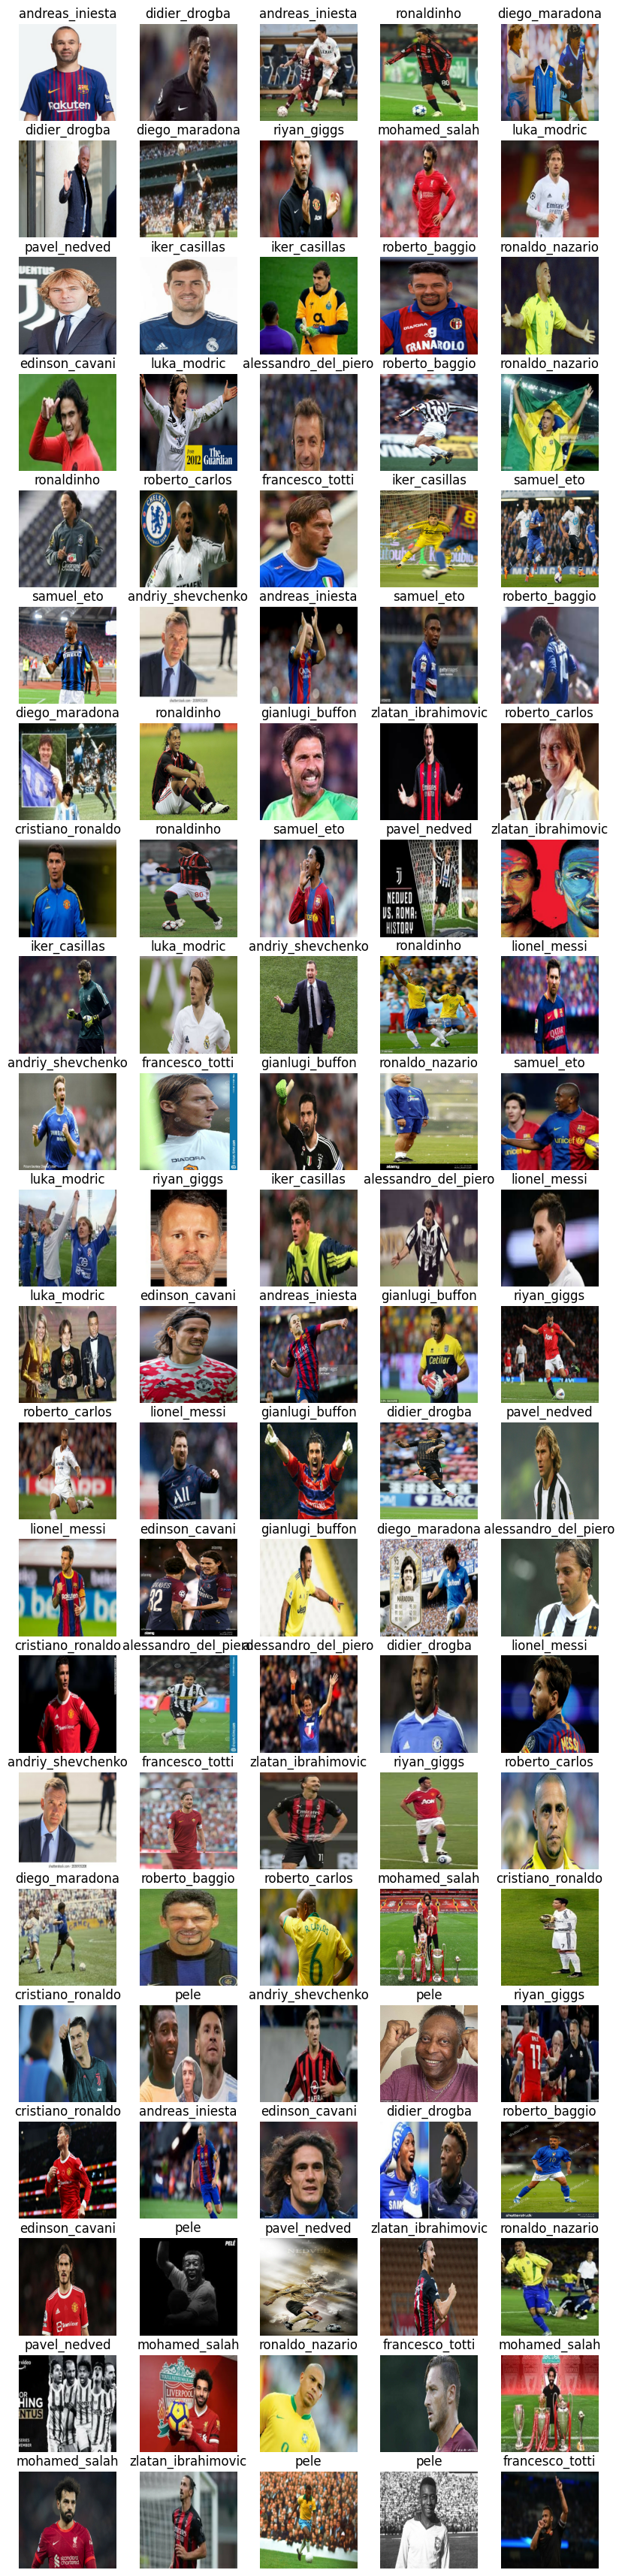

In [11]:
import matplotlib.pyplot as plt
import os

# Manually specify the class names based on the directory structure
class_names = sorted(os.listdir('/content/football_golden_foot/football_golden_foot'))
print("Class names:", class_names)

# Number of images to display per class
images_per_class = 5

# Set the figure size (adjust this based on the number of classes and images per class)
plt.figure(figsize=(images_per_class * 2, len(class_names) * 2))

# Initialize a dictionary to track how many images have been plotted per class
img_count = {class_name: 0 for class_name in class_names}

# Iterate through the dataset
for images, labels in train_ds:
    for i in range(len(images)):
        label_index = labels[i].numpy()  # Convert label tensor to numpy index
        label_name = class_names[label_index]  # Get class name
        if img_count[label_name] < images_per_class:
            plt.subplot(len(class_names), images_per_class, sum(img_count.values()) + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(label_name)
            plt.axis("off")
            img_count[label_name] += 1
        if all(count >= images_per_class for count in img_count.values()):
            break
    if all(count >= images_per_class for count in img_count.values()):
        break

plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Adjust spacing between images
plt.show()


In [12]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 51s 204ms/step - accuracy: 0.0457 - loss: -8144588.0000 - val_accuracy: 0.0445 - val_loss: -82569336.0000
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.0490 - loss: -530143680.0000 - val_accuracy: 0.0445 - val_loss: -1364161024.0000
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 25s 138ms/step - accuracy: 0.0480 - loss: -4734423552.0000 - val_accuracy: 0.0445 - val_loss: -10360546304.0000
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 39s 128ms/step - accuracy: 0.0492 - loss: -19617214464.0000 - val_accuracy: 0.0445 - val_loss: -40332595200.0000
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - accuracy: 0.0488 - loss: -54507196416.0000 - val_accuracy: 0.0445 - val_loss: -81558077440.0000
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.0477 - loss: -120799657984.0000 - val_accuracy: 0.0445 - val_loss: -194493235200.0000
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 38s 113ms/step - accuracy: 0.0468 - loss: -23326343

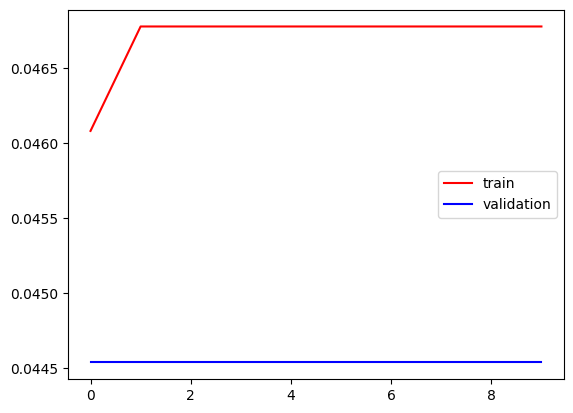

In [17]:
 plt.plot(history.history['accuracy'], color='red', label='train')
 plt.plot(history.history['val_accuracy'], color='blue', label='validation')
 plt.legend()
 plt.show()

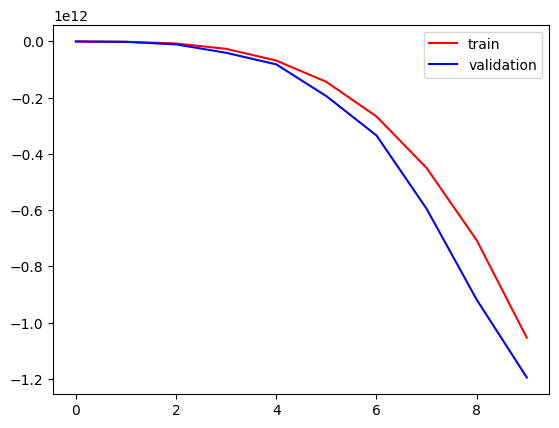

In [18]:
 plt.plot(history.history['loss'], color='red', label='train')
 plt.plot(history.history['val_loss'], color='blue', label='validation')
 plt.legend()
 plt.show()

In [22]:
print('Test Accuracy is', model.evaluate(validation_ds)[1]*100, '%')

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.0444 - loss: -1174414819328.0000
Test Accuracy is 4.453723132610321 %
